In [1]:
import data_preprocessing
from data_preprocessing import*

trainPath='/home/siva/Desktop/ml/liar_dataset/train.tsv'
testPath='/home/siva/Desktop/ml/liar_dataset/test.tsv'
validationPath='/home/siva/Desktop/ml/liar_dataset/valid.tsv'

train,y,test,testY,val,valY=data_preprocess(trainPath,testPath,validationPath,pred="single")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/siva/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#finding the optimal k value using tfidf vectors 
def optimal_k_tfidf(train, y, test, testY, mf, ngram_max):
    max_val = 0
    opt_k = 0
    accuracies = []
    for i in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn_acc = get_accuracies(train,y,test,testY,TfidfVectorizer(max_features=mf, ngram_range=(1,ngram_max)),knn,show_coefficients=False)

        if knn_acc[1] > max_val:
            max_val = knn_acc[1]
            opt_k = i 
        accuracies.append(knn_acc[1])
    return opt_k, max_val

#finding the optimal k value using count vectors 
def optimal_k_count(train, y, test, testY, mf, ngram_max):
    max_val = 0
    opt_k = 0
    accuracies = []
    for i in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn_acc = get_accuracies(train,y,test,testY,CountVectorizer(max_features=mf, ngram_range=(1,ngram_max)),knn,show_coefficients=False)

        if knn_acc[1] > max_val:
            max_val = knn_acc[1]
            opt_k = i 
        accuracies.append(knn_acc[1])
    return opt_k, max_val
#     return opt_k, max_val, accuracies




/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
optimal_tfidf = []
for n in range(1, 4):
    ks = []
    for f in range(100, 401, 50):
        k, acc = optimal_k_tfidf(train, y, test, testY, f, n)
        ks.append(k)
    optimal_tfidf.append(ks)
print(optimal_tfidf)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[24, 18, 18, 4, 16, 6, 4], [14, 12, 6, 20, 4, 2, 2], [18, 6, 6, 6, 6, 4, 2]]


In [4]:
optimal_cnt = []
for n in range(1, 4):
    ks = []
    for f in range(100, 401, 50):
        k, acc = optimal_k_count(train, y, test, testY, f, n)
        ks.append(k)
    optimal_cnt.append(ks)
print(optimal_cnt)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[7, 10, 14, 6, 2, 9, 2], [15, 9, 8, 18, 10, 8, 12], [12, 18, 15, 6, 9, 4, 4]]


/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Optimal K Values')

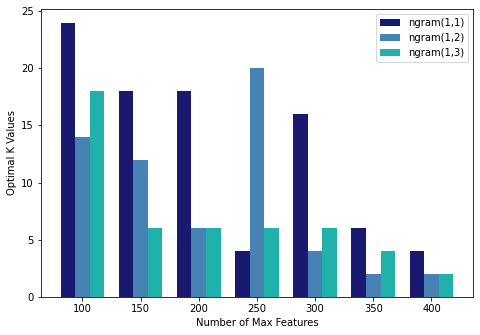

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = optimal_tfidf

X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
n1 = ax.bar(X + 0.00, data[0], color = 'midnightblue', width = 0.25)
n2 = ax.bar(X + 0.25, data[1], color = 'steelblue', width = 0.25)
n3 = ax.bar(X + 0.50, data[2], color = 'lightseagreen', width = 0.25)
ax.set_xticks(X + 0.25)
ax.set_xticklabels((100, 150, 200, 250, 300, 350, 400))
ax.legend((n1,n2,n3), ('ngram(1,1)','ngram(1,2)','ngram(1,3)'))
ax.set_xlabel('Number of Max Features')
ax.set_ylabel('Optimal K Values')

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Optimal K Values')

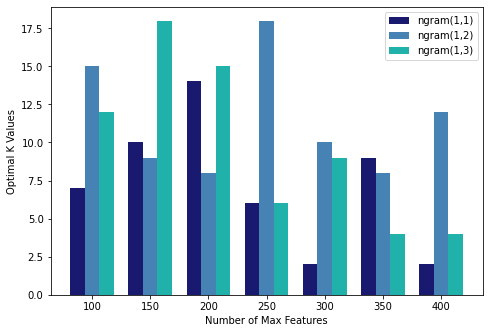

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = optimal_cnt

X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
n1 = ax.bar(X + 0.00, data[0], color = 'midnightblue', width = 0.25)
n2 = ax.bar(X + 0.25, data[1], color = 'steelblue', width = 0.25)
n3 = ax.bar(X + 0.50, data[2], color = 'lightseagreen', width = 0.25)
ax.set_xticks(X + 0.25)
ax.set_xticklabels((100, 150, 200, 250, 300, 350, 400))
ax.legend((n1,n2,n3), ('ngram(1,1)','ngram(1,2)','ngram(1,3)'))
ax.set_xlabel('Number of Max Features')
ax.set_ylabel('Optimal K Values')

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy : 0.798358733880422
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       680
           1       1.00      0.01      0.01       173

    accuracy                           0.80       853
   macro avg       0.90      0.50      0.45       853
weighted avg       0.84      0.80      0.71       853

MSE : 0.20866354044548652
Bias : 0.20074718640093786
Variance : 0.007916354044548652
======Confusion Matrix======

 [[680   0]
 [172   1]]


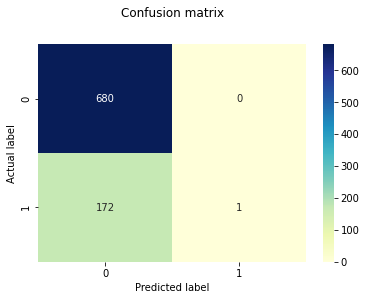

KNeighborsClassifier(n_neighbors=6)

In [7]:
get_accuracy_with_confusion_matrix(train,y,test,testY,TfidfVectorizer(ngram_range=(1,2),binary=True,max_features=200),KNeighborsClassifier(n_neighbors=6),nump=False)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy : 0.7995310668229777
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       680
           1       1.00      0.01      0.02       173

    accuracy                           0.80       853
   macro avg       0.90      0.51      0.46       853
weighted avg       0.84      0.80      0.71       853

MSE : 0.207010550996483
Bias : 0.1951082063305979
Variance : 0.011902344665885111
======Confusion Matrix======

 [[680   0]
 [171   2]]


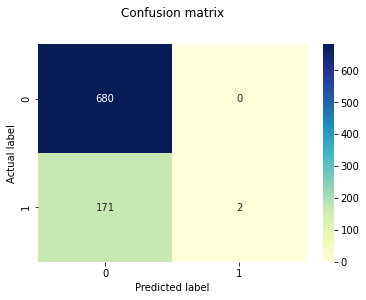

KNeighborsClassifier(n_neighbors=8)

In [8]:
get_accuracy_with_confusion_matrix(train,y,test,testY,CountVectorizer(ngram_range=(1,2),binary=True,max_features=200),KNeighborsClassifier(n_neighbors=8),nump=False)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy : 0.7924970691676436
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       680
           1       0.00      0.00      0.00       173

    accuracy                           0.79       853
   macro avg       0.40      0.50      0.44       853
weighted avg       0.63      0.79      0.70       853

MSE : 0.21876905041031655
Bias : 0.1928317116060961
Variance : 0.0259373388042204
======Confusion Matrix======

 [[676   4]
 [173   0]]


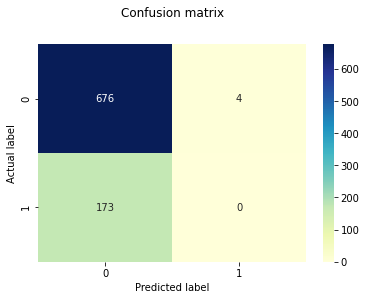

KNeighborsClassifier(n_neighbors=8)

In [9]:
#Accuracy after adding sentiment to the sentence using positive and negative tags to KNN model using CountVectorizer
train,y,test,testY,val,valY=data_preprocess(trainPath,testPath,validationPath,pred="single")
train,test,val=append_senti_to_sent(train,test,val)
get_accuracy_with_confusion_matrix(train,y,test,testY,CountVectorizer(ngram_range=(1,2),binary=True,max_features=200),KNeighborsClassifier(n_neighbors=8),nump=False)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy : 0.7924970691676436
              precision    recall  f1-score   support

           0       0.80      0.99      0.88       680
           1       0.25      0.01      0.02       173

    accuracy                           0.79       853
   macro avg       0.52      0.50      0.45       853
weighted avg       0.69      0.79      0.71       853

MSE : 0.24091441969519342
Bias : 0.19693563892145372
Variance : 0.04397878077373975
======Confusion Matrix======

 [[674   6]
 [171   2]]


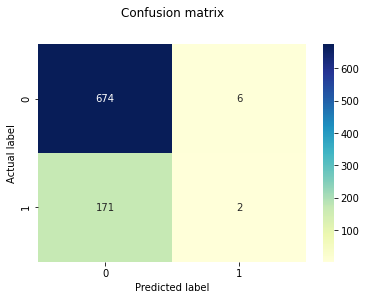

KNeighborsClassifier(n_neighbors=8)

In [10]:
#Accuracy after adding sentiment to the sentence using positive and negative tags to KNN model using TfidfVectorizer
get_accuracy_with_confusion_matrix(train,y,test,testY,TfidfVectorizer(ngram_range=(1,2),binary=True,max_features=200),KNeighborsClassifier(n_neighbors=8),nump=False)

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy : 0.7971864009378663
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       680
           1       0.00      0.00      0.00       173

    accuracy                           0.80       853
   macro avg       0.40      0.50      0.44       853
weighted avg       0.64      0.80      0.71       853



/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MSE : 0.2127491207502931
Bias : 0.19736157678780775
Variance : 0.015387543962485347
======Confusion Matrix======

 [[680   0]
 [173   0]]


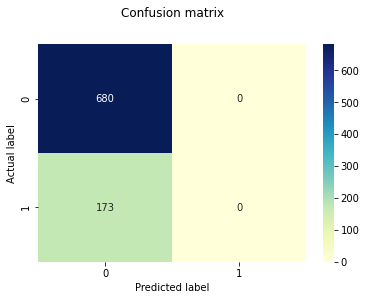

KNeighborsClassifier(n_neighbors=8)

In [11]:
#Accuracy after adding sentiment as a feature to end of vector to KNN model using TfidfVectorizer
train,y,test,testY,val,valY=data_preprocess(trainPath,testPath,validationPath,pred="single")
get_accuracy_with_confusion_matrix(train,y,test,testY,TfidfVectorizer(ngram_range=(1,2),binary=True,max_features=200),KNeighborsClassifier(n_neighbors=8),nump=True,senti="add")

/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy : 0.7971864009378663
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       680
           1       0.00      0.00      0.00       173

    accuracy                           0.80       853
   macro avg       0.40      0.50      0.44       853
weighted avg       0.64      0.80      0.71       853



/home/siva/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MSE : 0.20742086752637745
Bias : 0.19541254396248534
Variance : 0.012008323563892148
======Confusion Matrix======

 [[680   0]
 [173   0]]


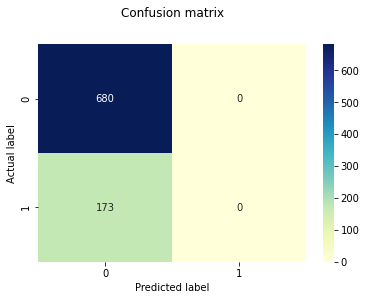

KNeighborsClassifier(n_neighbors=8)

In [12]:
#sentiment with appending vectors
get_accuracy_with_confusion_matrix(train,y,test,testY,CountVectorizer(ngram_range=(1,2),binary=True,max_features=200),KNeighborsClassifier(n_neighbors=8),nump=True,senti="add")